In [92]:
from google_play_scraper import app, reviews


In [93]:
# Define the app package name
app_package = 'com.jio.media.ondemand'


In [94]:
# Fetch the app information
app_info = app(app_package)


In [95]:
# Print the app name
print("App Name:", app_info['title'])


App Name: JioCinema - TATA IPL & more


In [96]:
result, continuation_token = reviews(
    app_package,
    lang='en',  # Language code (optional, default: 'en')
    country='us',  # Country code (optional, default: 'us')
    #sort=review.Sort.NEWEST,  # Sort type (optional, default: reviews.Sort.MOST_RELEVANT)
    count=1000,  # Number of reviews to fetch (optional, default: 100)
)

In [97]:
import pandas as pd 
df = pd.DataFrame(result)

In [57]:
import openai

# Set your OpenAI API key
openai.api_key = ''



In [58]:
def generate_summary(reviews):
    prompt = f"Summarize the following reviews:\n{reviews}\n\nSummary:"
    response = openai.Completion.create(
        engine="gpt-3.5-turbo-instruct",
        prompt=prompt,
        max_tokens=150,
        temperature=0.5,
        top_p=1.0,
        n=1,
        stop=["\n"]
    )
    return response.choices[0].text.strip()



In [62]:
# Concatenate the reviews into a single string
reviews_text = "\n".join(df['content'])


In [63]:
summary = generate_summary(reviews_text)
print(summary)


The Jio Cinema app has received mixed reviews from users. While some appreciate the app for its free streaming of IPL matches and a variety of movies and shows, others have complained about the slow loading time and frequent crashes. Some users have also mentioned issues with live streaming and lagging. Overall, the app seems to have room for improvement in terms of its performance and user experience.


In [70]:
from textblob import TextBlob


# Function to determine sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


In [98]:
# Apply sentiment analysis to each review
df['sentiment'] = df['content'].apply(get_sentiment)


In [99]:
df.head(100)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment
0,9033de1b-6712-4b2a-b4db-929bdb893ab1,DISHU R2005,https://play-lh.googleusercontent.com/a/ACg8oc...,very slow,1,0,24.03.170-0a56ade,2024-04-19 03:14:15,Hi! We are here to help. Please share the exac...,2024-04-19 07:26:42,24.03.170-0a56ade,Negative
1,6672f542-2cf9-4f56-802f-a83edddec557,Harendra Prajapati,https://play-lh.googleusercontent.com/a-/ALV-U...,डाउनलोड करने मे बहुत समय लगता है,1,0,None,2024-04-19 02:19:56,Hi Harendra! We are here to help. Please share...,2024-04-19 07:29:00,None,Neutral
2,442df5fc-8562-4ae0-aca3-724d2398d512,Sneha Shaw,https://play-lh.googleusercontent.com/a-/ALV-U...,Not working properly....,1,0,24.04.140-7ce329f,2024-04-19 02:13:01,Hi Sneha! We are here to help. Please share th...,2024-04-19 07:28:31,24.04.140-7ce329f,Neutral
3,d1b86d93-161f-4c91-b0b9-0cdc8a18e947,JOGENDRA KUMAR DHARIWAL,https://play-lh.googleusercontent.com/a/ACg8oc...,GOOD.APPS SABHAOYAHI.ORKAHA.,5,0,None,2024-04-19 02:11:08,None,NaT,None,Neutral
4,24a70e57-e157-47b2-9c49-548693e96049,Sneha Gupta,https://play-lh.googleusercontent.com/a/ACg8oc...,It's not at all working. I have uninstalled an...,1,0,None,2024-04-19 01:19:24,Hi Sneha! We are here to help. Please share yo...,2024-04-19 06:26:16,None,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1c14d4b7-ef1f-4be8-a6ab-fddd9d0b45fd,Shabnam Khatoon,https://play-lh.googleusercontent.com/a/ACg8oc...,Somethings this app is not working,2,0,24.04.140-7ce329f,2024-04-18 23:01:00,Hi Shabnam! We are here to help. Please share ...,2024-04-18 23:04:12,24.04.140-7ce329f,Neutral
96,9e77ee4d-af46-4384-8f72-359fe60b5595,Chandhu 777,https://play-lh.googleusercontent.com/a-/ALV-U...,Update 🥺,1,0,None,2024-04-18 23:00:51,Hi! We are here to help. Please share the exac...,2024-04-18 23:09:26,None,Neutral
97,84354fc4-b66d-4aec-b699-0c433152bb17,Depression King,https://play-lh.googleusercontent.com/a-/ALV-U...,"Worst app i have ever seen, network issue, lag...",1,0,24.03.300-d53ce23331,2024-04-18 23:00:50,Hi! We are here to help. Please share your con...,2024-04-18 23:08:33,24.03.300-d53ce23331,Negative
98,c0022d0c-240e-4185-9a89-3924cc3ab40a,Md Rahmatullah,https://play-lh.googleusercontent.com/a-/ALV-U...,"Every time comes error, after updating many ti...",2,0,None,2024-04-18 22:57:38,Hi! We are here to help. Please share your con...,2024-04-18 23:04:42,None,Positive


In [109]:
df_count= df.groupby(['appVersion', 'sentiment'],as_index=True).count()['reviewId']

In [110]:
df_count= pd.DataFrame(df_count).reset_index()

In [115]:
df_count.columns = ['appVersion', 'sentiment','count']

In [116]:
df_count

,appVersion,sentiment,count
0,1.7.0.6,Neutral,1
1,23.11.080-f7659dd,Negative,1
2,23.11.080-f7659dd,Positive,1
3,23.12.220-baeccec,Negative,1
4,24.01.240-b77e58b,Negative,1
5,24.02.010-8bbf9f8,Neutral,1
6,24.03.020-78fd2a2,Neutral,2
7,24.03.020-78fd2a2,Positive,4
8,24.03.170-0a56ade,Negative,3
9,24.03.170-0a56ade,Neutral,5


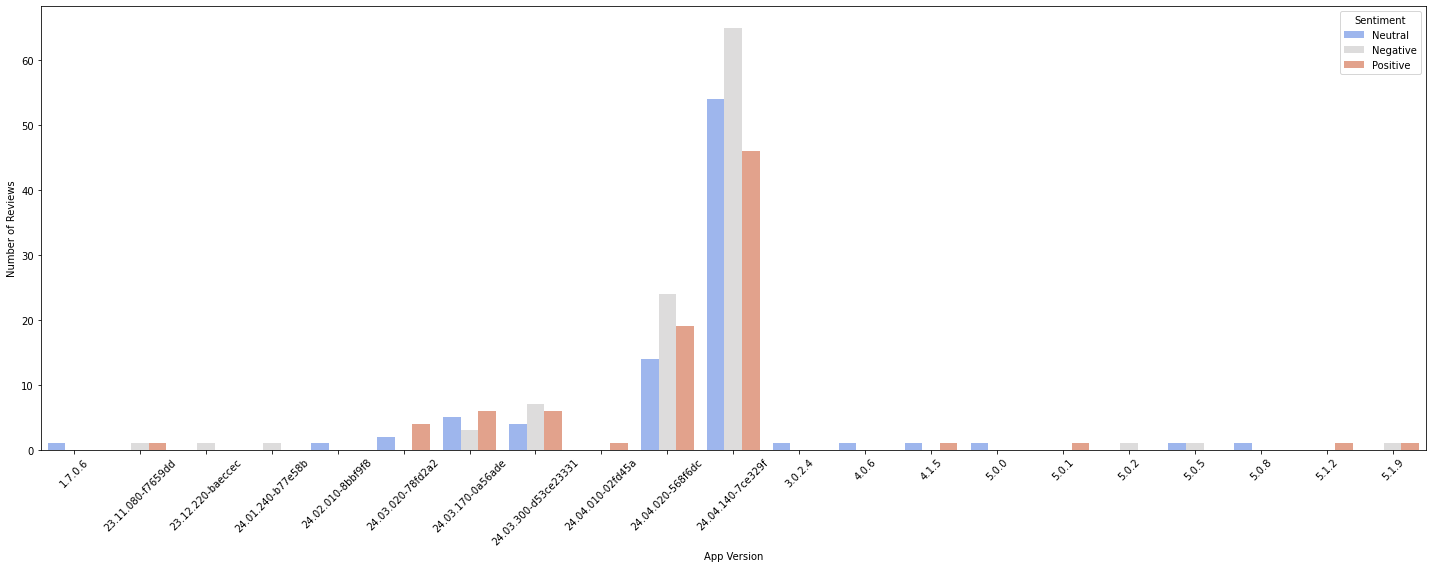

In [120]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,8))

import seaborn as sns 
sns.barplot(x='appVersion', y='count', hue='sentiment', data=df_count, palette='coolwarm', saturation=0.7)
plt.xlabel('App Version')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()